In [1]:
parameter_file = 'params/params.yaml'
import yaml
import sys
import glob
import os
import pandas as pd
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation_gtf']

In [2]:
from Homer import *
%matplotlib inline

## Nucleotide frequency plot

## Merged peaks

In [3]:
if not os.path.exists("Results/nuc_freq_plots"):
    os.mkdir("Results/nuc_freq_plots")

annotatePeaks.pl Results/merged/samples.merge /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_plots/samples.merge.nuc_freq_200


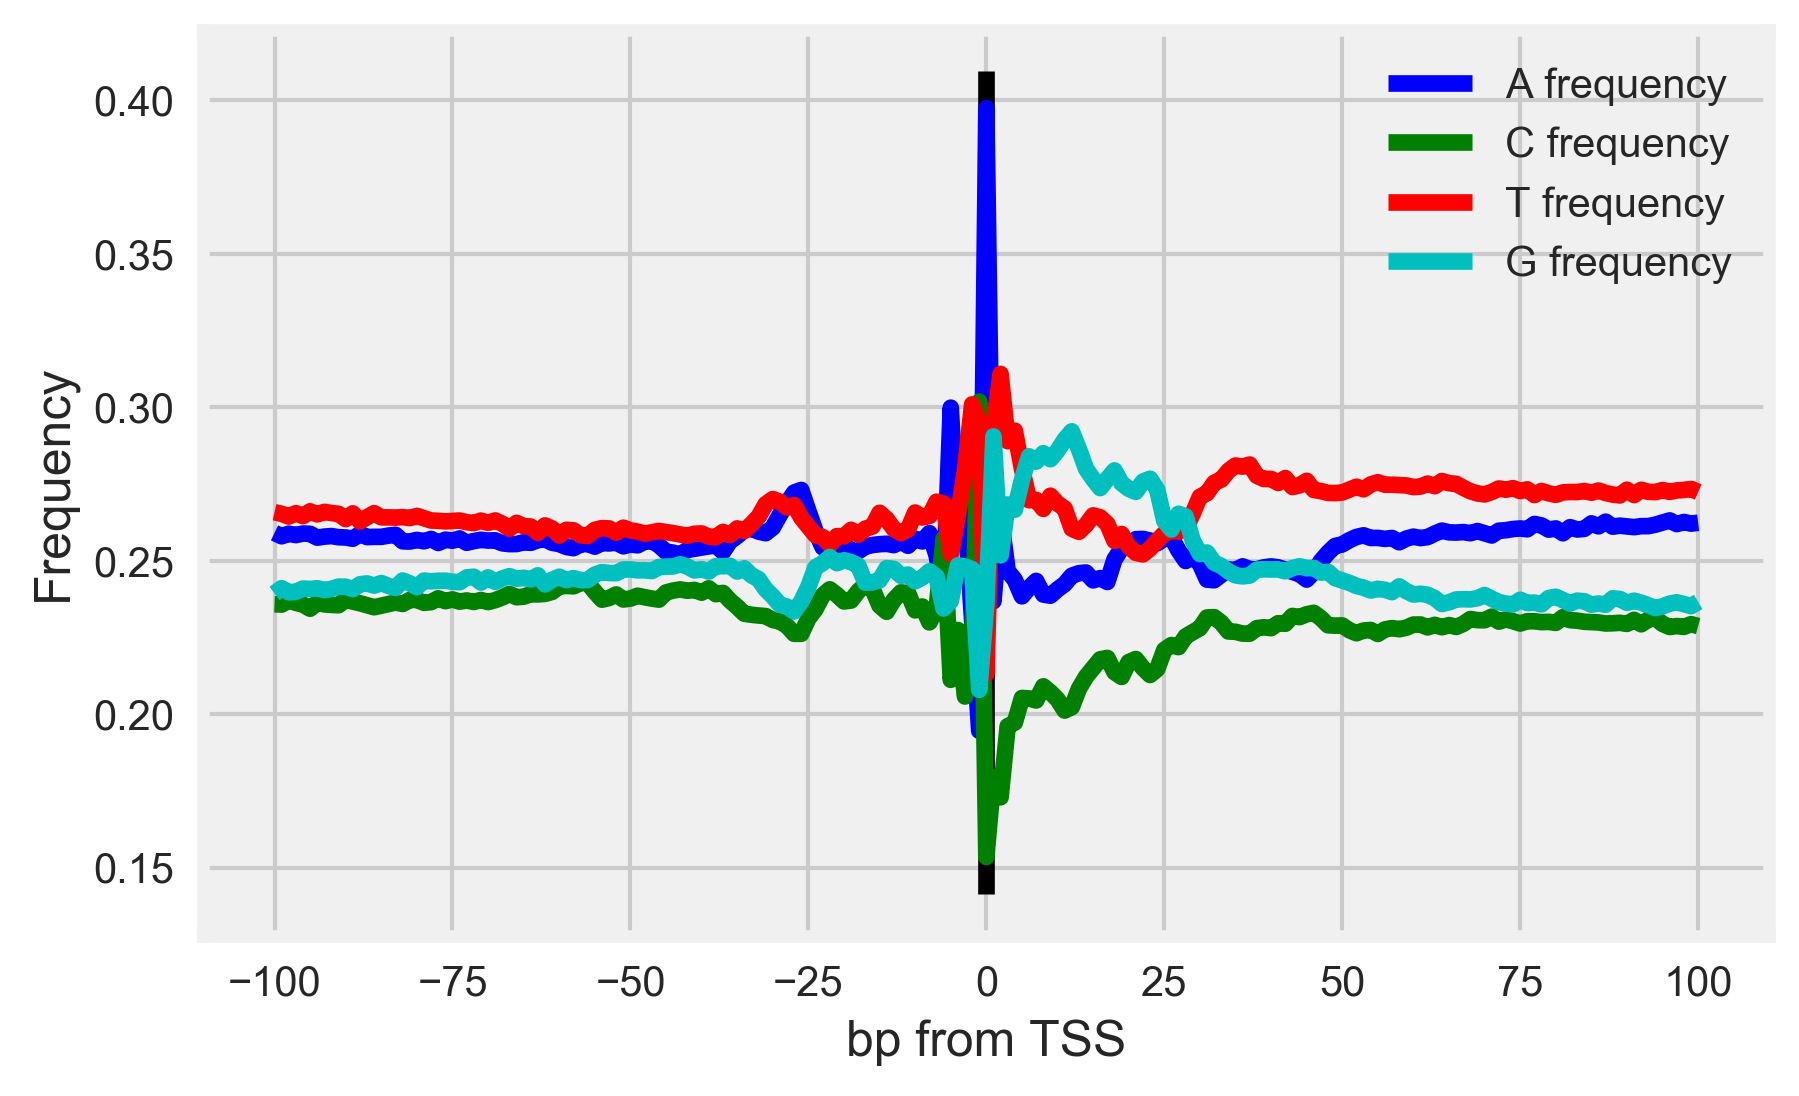

In [4]:
homer_nucleotide(
    'Results/merged/samples.merge',
    'Results/nuc_freq_plots/samples.merge.nuc_freq_200',
    ref_fa,
    size=200)

## All mRNAs

annotatePeaks.pl /data/isshamie/genome/picr_final/mRNA_final.peak /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_plots/refseq.nuc_freq_200.txt


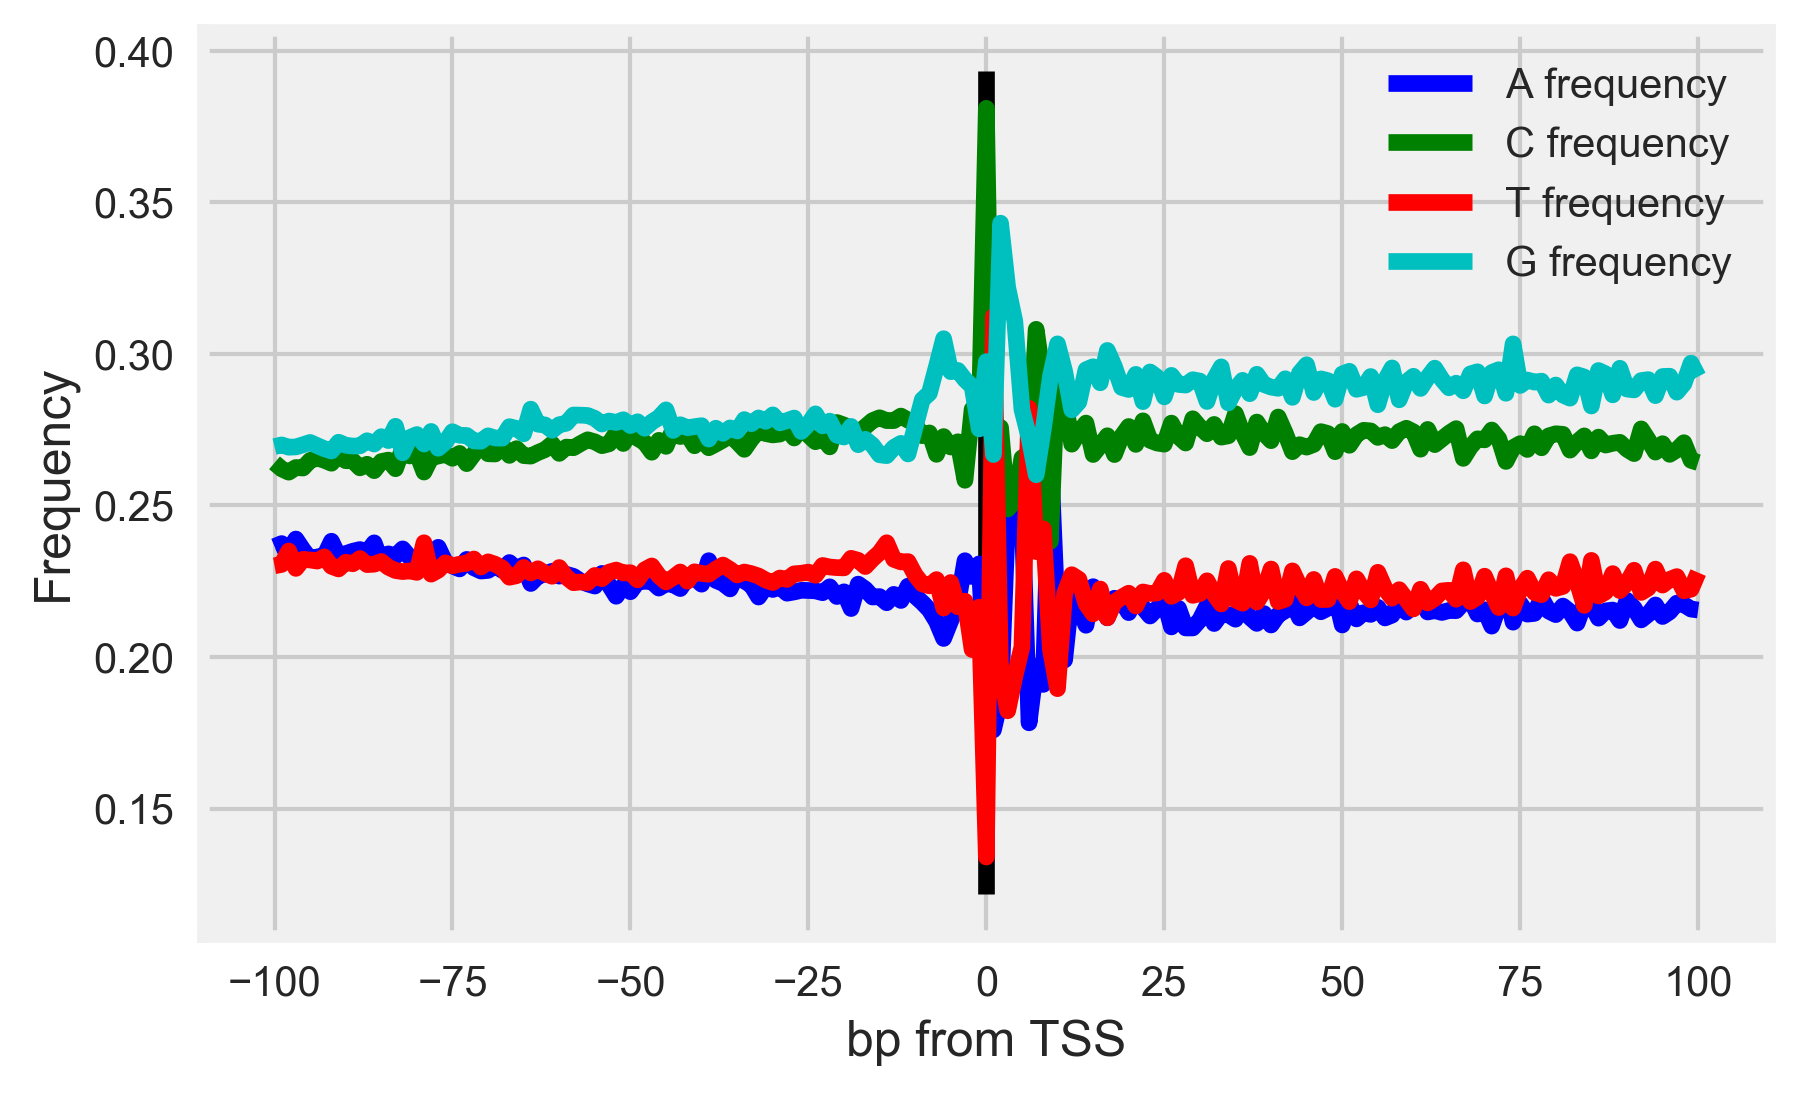

In [5]:
homer_nucleotide(
    '/data/isshamie/genome/picr_final/mRNA_final.peak',
    'Results/nuc_freq_plots/refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

## Experimental TSS 

annotatePeaks.pl /data/isshamie/TSS/Analysis/10_15_Results/Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_plots/tss_gene_df_01.nuc_freq_200


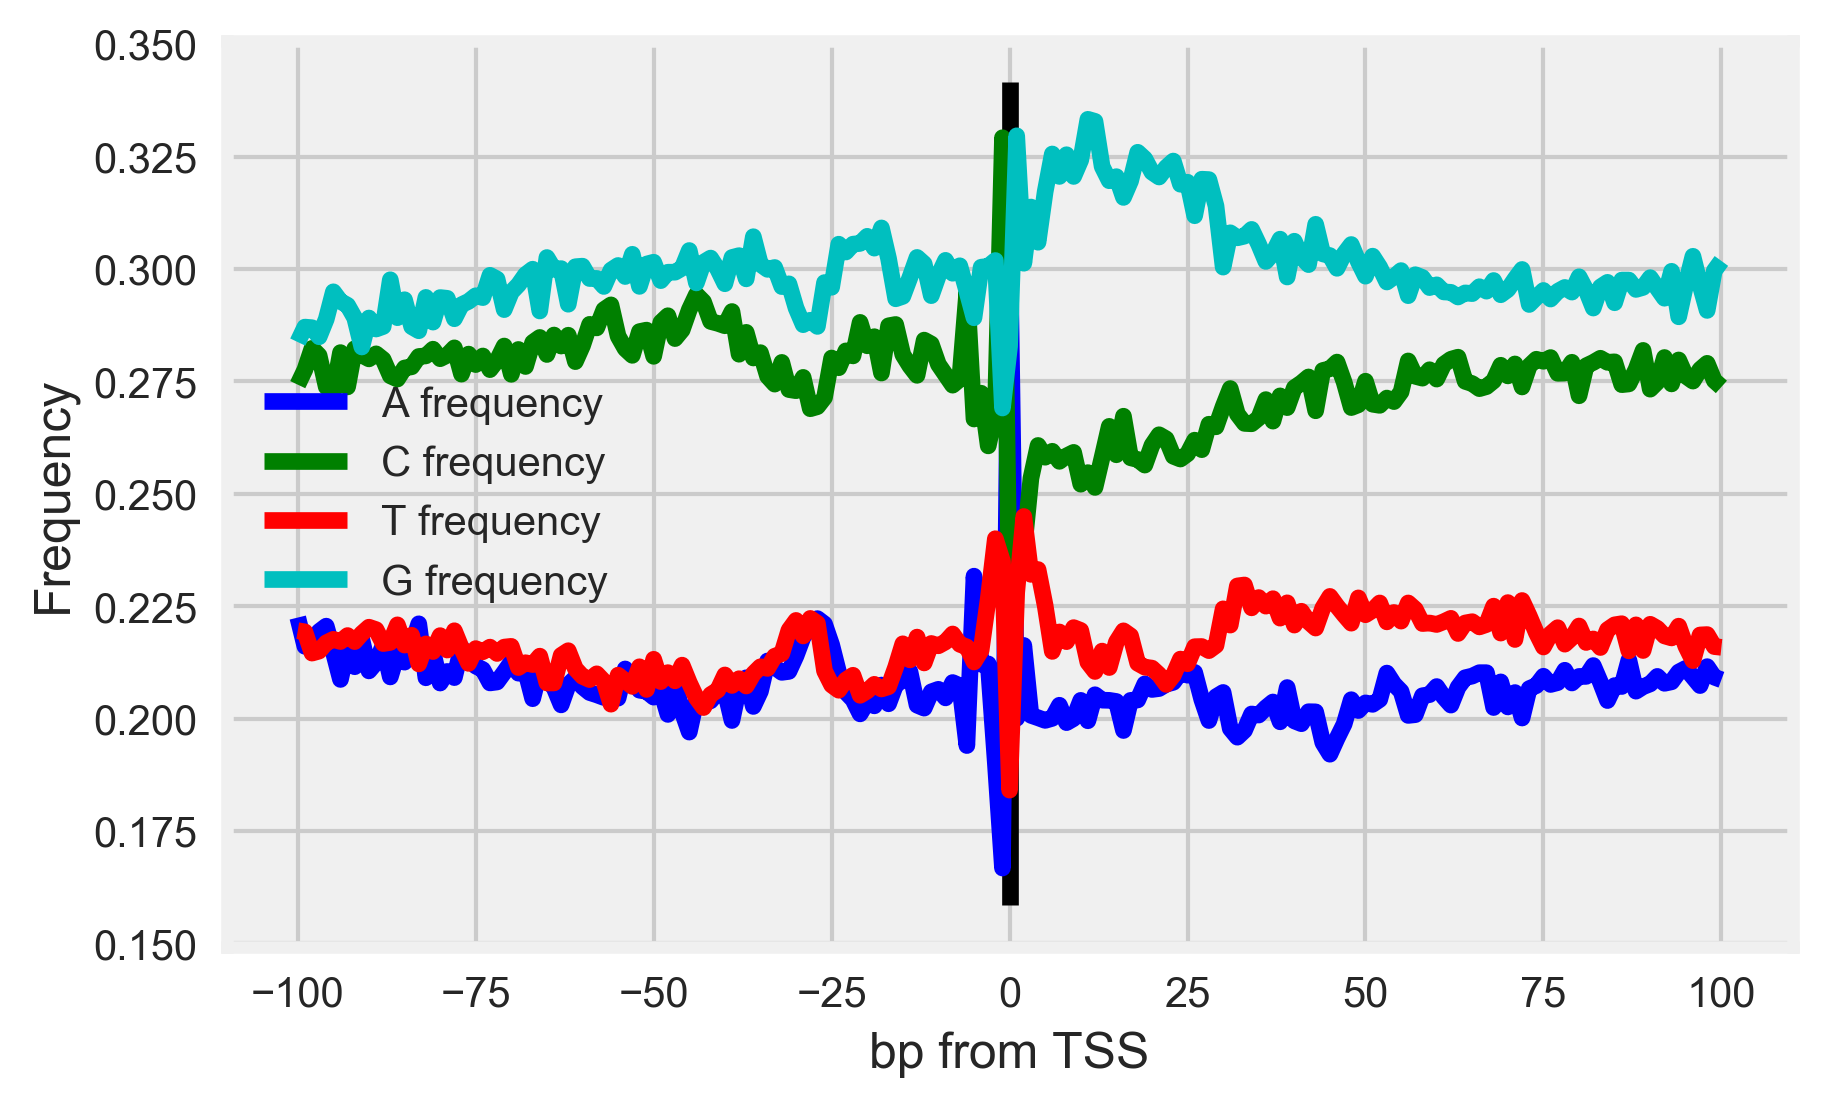

In [6]:
homer_nucleotide(
    '/data/isshamie/TSS/Analysis/10_15_Results/Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv',
    'Results/nuc_freq_plots/tss_gene_df_01.nuc_freq_200',
    ref_fa,
    size=200)

annotatePeaks.pl Results/tss_annotation_peaks/all_peaks_max_gene_df_01.tsv /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_plots/max_tss_gene_df_01


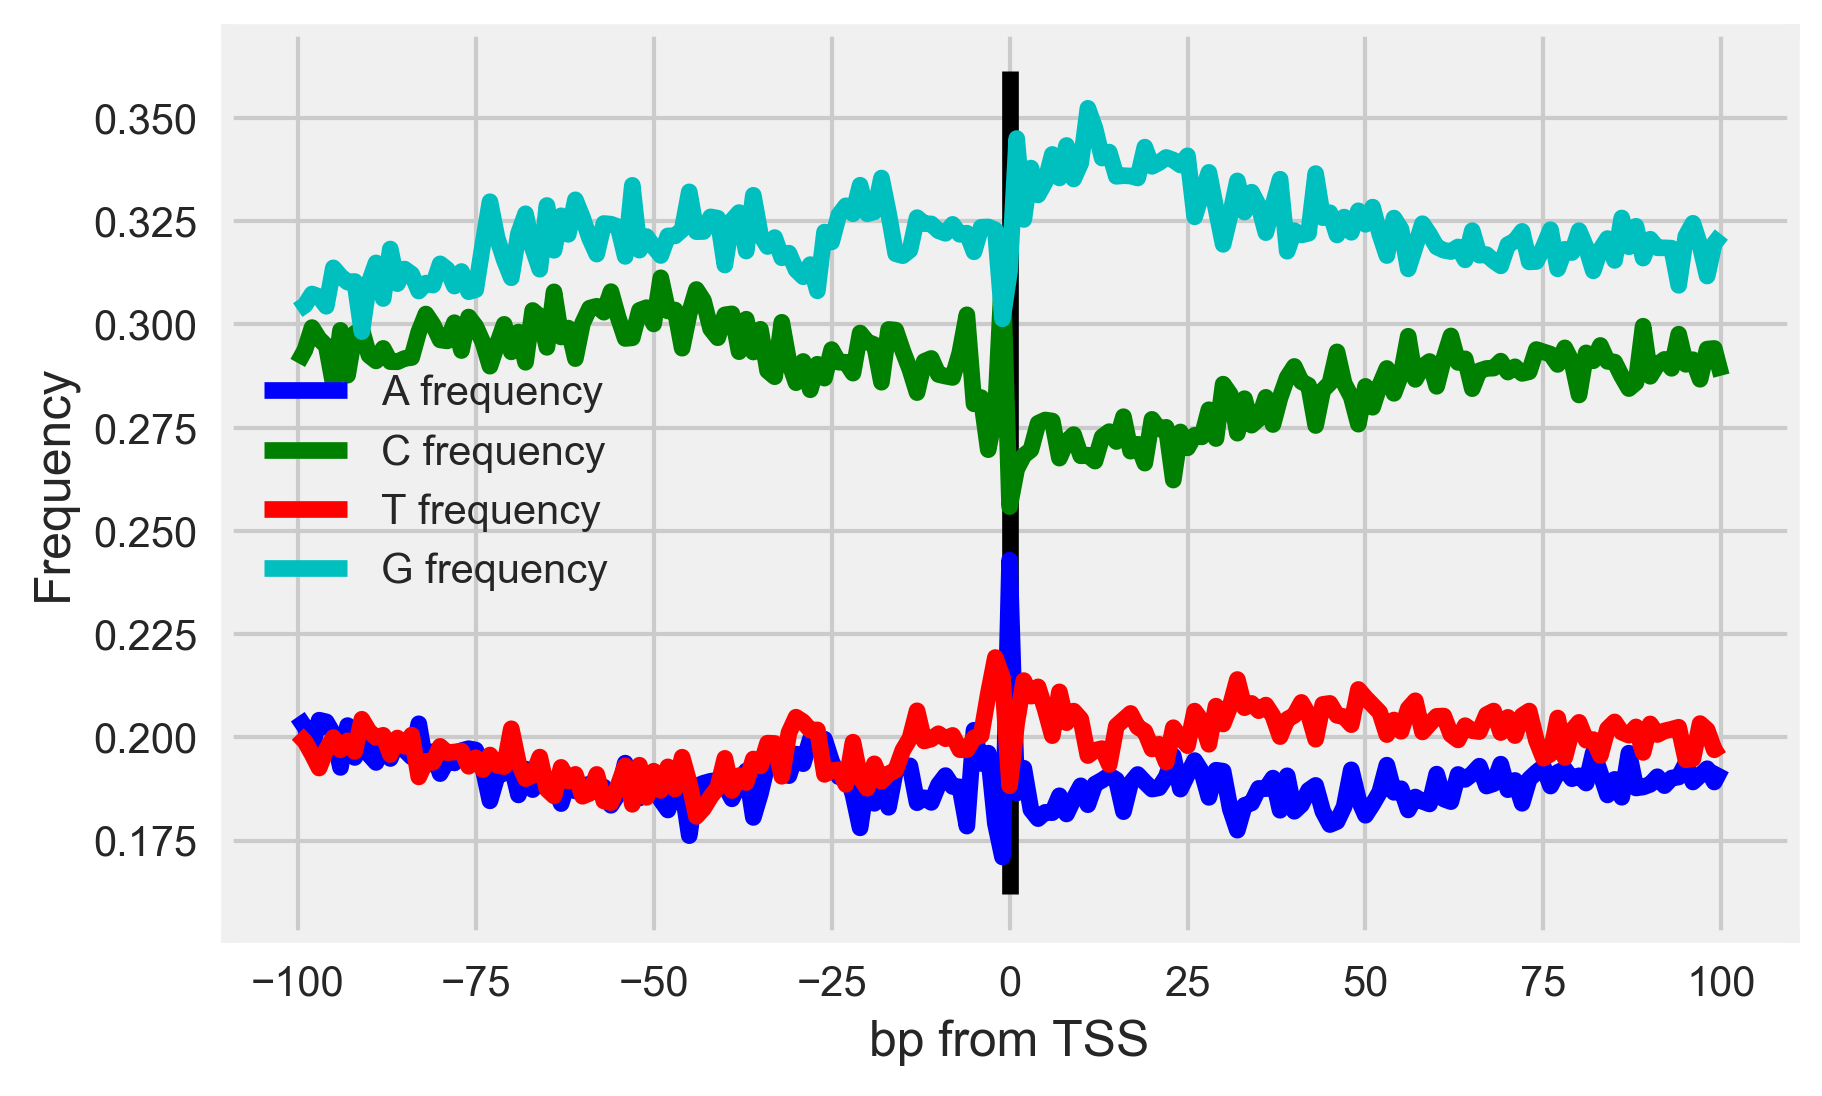

In [7]:
homer_nucleotide(
    "Results/tss_annotation_peaks/all_peaks_max_gene_df_01.tsv",
    'Results/nuc_freq_plots/max_tss_gene_df_01',
    ref_fa,
    size=200)

## RefSeq TSS 

annotatePeaks.pl Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt /data/isshamie/genome/picr_final/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_plots/tss_gene_df_01.refseq.nuc_freq_200.txt


KeyError: 'A frequency'

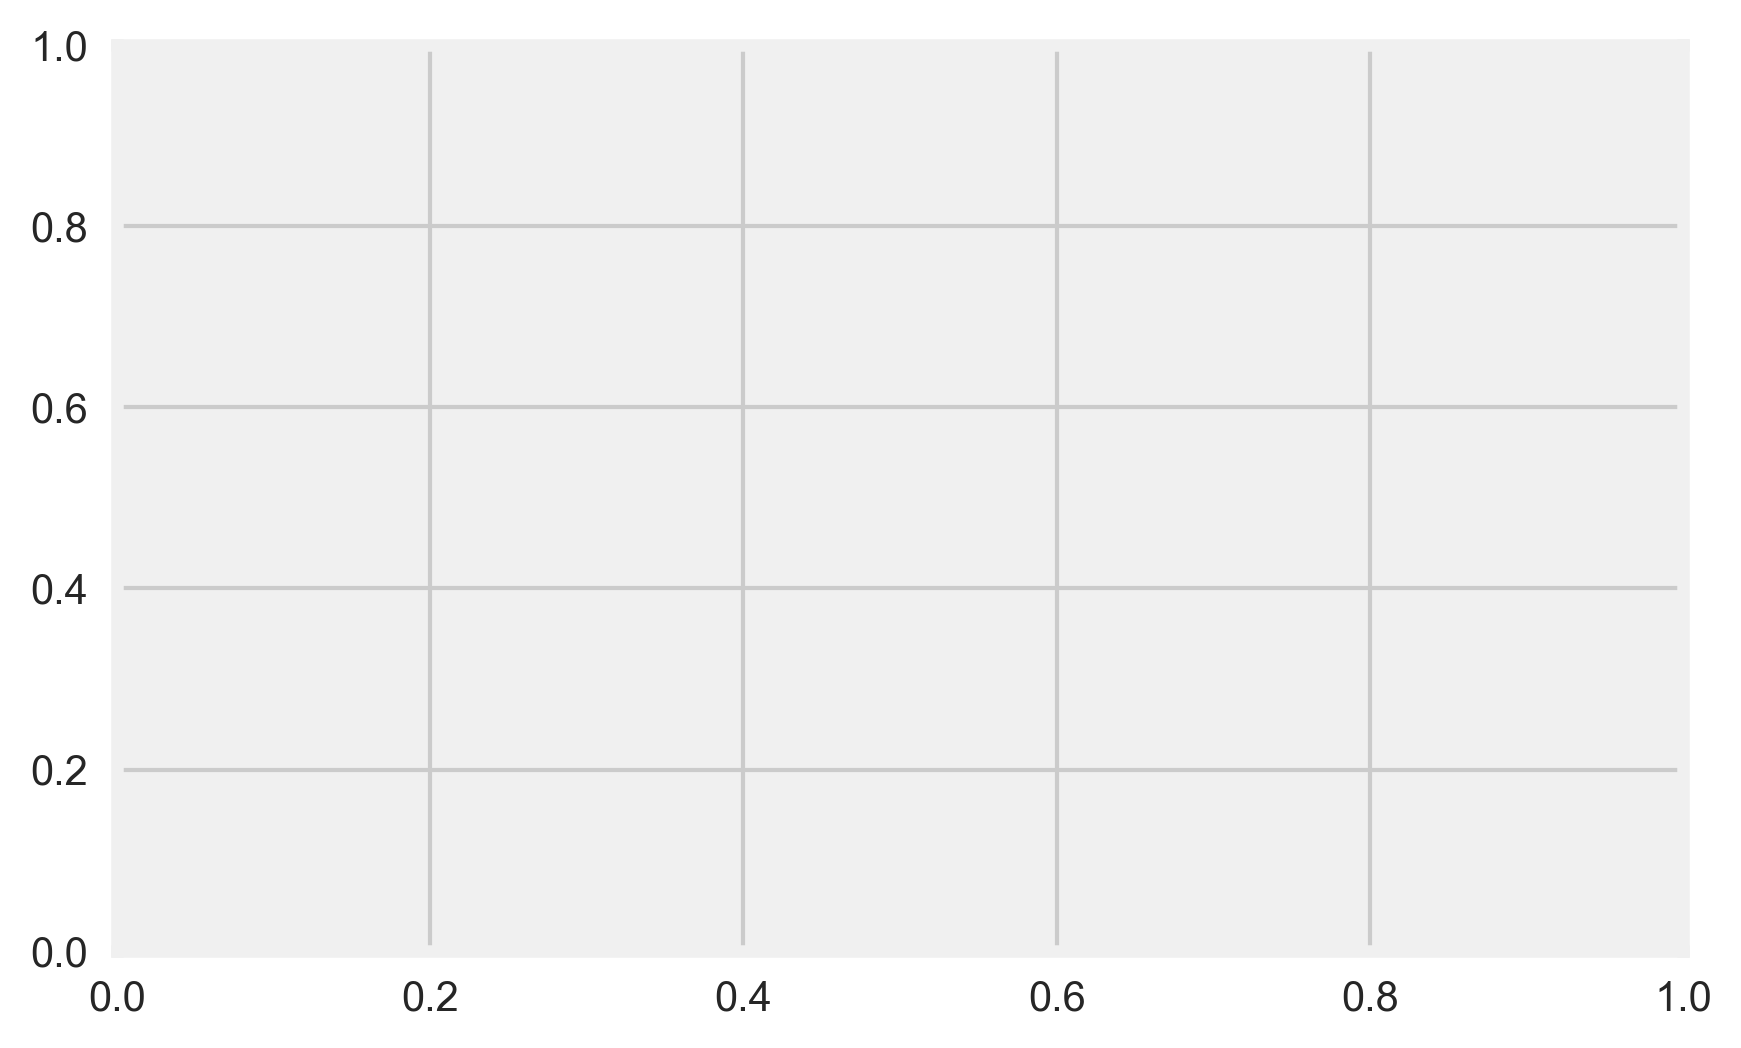

In [8]:
homer_nucleotide(
    "Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt",
    'Results/nuc_freq_plots/tss_gene_df_01.refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

In [ ]:
homer_nucleotide(
    "Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt",
    'Results/nuc_freq_plots/tss_gene_df_01.refseq.nuc_freq_200.txt',
    ref_fa,
    size=1000)

In [ ]:
homer_nucleotide(
    '/data/isshamie/TSS/Analysis/10_15_Results/Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv',
    'Results/nuc_freq_plots/tss_gene_df_01.nuc_freq_50',
    ref_fa,
    size=50)

In [ ]:
homer_nucleotide(
    '/data/isshamie/TSS/Analysis/10_15_Results/Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv',
    'Results/nuc_freq_plots/tss_gene_df_01.nuc_freq_200',
    ref_fa,
    size=200)

## Create Peak file from the merged peaks and nucleotide frequency

In [10]:
mRNA_peak_file = '/data/isshamie/genome/picr_final/mRNA_final.peak'
input_file = 'Results/merged/samples.merge'
f_save = os.path.join('Results/', os.path.basename(mRNA_peak_file))
peakFileToPeakFile(
    mRNA_peak_file, input_file, distance=1000, f_save=f_save, is_peak=False)

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,ID,Chr,Start,End,Strand,actual_start
3,ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44541,44543,-,44542
4,ID=asmbl_6;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,45911,45913,-,45912
5,ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,46629,46631,-,46630
6,ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44596,44598,-,44597
7,ID=asmbl_8;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44596,44598,-,44597
8,ID=asmbl_9;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44567,44569,-,44568
9,ID=asmbl_10;Parent=gene_2;gene_id=gene_2;gene=...,picr_0,44512,44514,-,44513
11,ID=asmbl_12;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20786,20788,+,20787
12,ID=asmbl_13;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20941,20943,+,20942
13,ID=asmbl_14;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20941,20943,+,20942


In [ ]:
homer_nucleotide(
    'Results/output/TSS1.exp.bed',
    'Results/nuc_freq_plots/TSS1.exp.bed.nuc_freq_200',
    ref_fa,
    size=200)

In [ ]:
homer_nucleotide(
    'Results/output/TSS1.ref.bed',
    'Results/nuc_freq_plots/TSS1.exp.bed.nuc_freq_200',
    ref_fa,
    size=200)